<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase-2-Project" data-toc-modified-id="Phase-2-Project-0">Phase 2 Project</a></span><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-0.1">Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-0.2">Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.2.1">Importing Libraries</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-0.3">Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Drops" data-toc-modified-id="Drops-0.3.0.1">Drops</a></span></li><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-0.3.0.2">Removing Outliers</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-0.3.1">Helper Functions</a></span></li><li><span><a href="#The-Train-Test-Split" data-toc-modified-id="The-Train-Test-Split-0.3.2">The Train-Test Split</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-0.3.3">Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-0.3.3.1">Waterfront</a></span></li><li><span><a href="#View" data-toc-modified-id="View-0.3.3.2">View</a></span></li><li><span><a href="#Condition" data-toc-modified-id="Condition-0.3.3.3">Condition</a></span></li><li><span><a href="#Grade" data-toc-modified-id="Grade-0.3.3.4">Grade</a></span></li><li><span><a href="#Zipcode" data-toc-modified-id="Zipcode-0.3.3.5">Zipcode</a></span></li><li><span><a href="#Bedroom_bins" data-toc-modified-id="Bedroom_bins-0.3.3.6">Bedroom_bins</a></span></li></ul></li><li><span><a href="#Our-iterative-modeling-process" data-toc-modified-id="Our-iterative-modeling-process-0.3.4">Our iterative modeling process</a></span><ul class="toc-item"><li><span><a href="#Base-Model---Dummy-Regressor" data-toc-modified-id="Base-Model---Dummy-Regressor-0.3.4.1">Base Model - Dummy Regressor</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-0.3.4.2">Model 1</a></span></li><li><span><a href="#Model-6" data-toc-modified-id="Model-6-0.3.4.3">Model 6</a></span></li><li><span><a href="#Model-7" data-toc-modified-id="Model-7-0.3.4.4">Model 7</a></span></li><li><span><a href="#Model-8" data-toc-modified-id="Model-8-0.3.4.5">Model 8</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Phase 2 Project

## Business Understanding

Our chosen stakeholder is the real-estate agency Keller Williams, who's looking to expand into King County in Washington. They want an analytically supported strategy based on inferential and predictive analysis of the data available on the king county website. Our approach to formulating the business question was to first define our recommended strategy and formulate the business question around it. Accordingly, we formulated three questions that we wanted to answer using our data analysis and based our recommendations on those questions. 

## Data Understanding

The data that we used originally came from the King County website. It contains a good mix of categorical and numerical data. We wanted to focus on variables that corresponded to features that determine that demand of the any given house. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.api import OLS

#SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

The libraries that we have imported are libraries that we used throughout this project, in data preparation and modeling sections.

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The table above illustrates the raw data set and how its formatted, while the table below lists all the columns in the data set and what data type the information in that column is. Furthermore, it also gives us an initial idea of the proportion of missing (null) values there are in each column. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

Our approach to data preparation was systematic. First we dropped columns that that didn't have enough data to incorporate into our model and we also removed some extraneous outliers

#### Drops

We dropped the variable 'yr_renovated' because it was missing values for about 70% of our dataset. Furthermore, we dropped the variables 'id' and 'date' because we felt that those variables will be less reliable predictors. We also dropped an outlier from our data set; a house with 33 bedrooms. We also created a bedrooms bin column to use ahead.

In [4]:
df = df[df['bedrooms'] != 33]

In [5]:
#Making a categorical bedroom columns
df['bedrooms_bin']=pd.cut(df['bedrooms'], bins = [0,1,2,3,4,5,6,99], labels=['1BR','2BR','3BR','4BR','5BR','6BR','7+BR'])

In [6]:
df = df.drop(['id', 'date', 'yr_renovated','sqft_basement'], axis=1) 

#### Removing Outliers

When looking at removing outliers from our data set, we first used the numpy library to calculate our quantiles to determine which rows are the outliers. Based on the values we calculated for two numerical variables : 'price' and 'sqft_lot', we removed the corresponding rows. Furthermore, for the categorical variable 'grade' we performed the value_counts method in pandas to determine the counts of houses for each grade. Since the grades '3 Poor' and '12 Luxury' only have one record each, we excluded those values from our final processing data set as well.

In [7]:
price_q75, price_q25 = np.percentile(df['price'],[75,25])
intr_qrt = price_q75-price_q25
upper_price = price_q75 + (1.5*intr_qrt)
lower_price = price_q25 - (1.5*intr_qrt)
lower_price, upper_price
df = df[df['price'] <= upper_price]
df = df[df['price'] >= lower_price]

In [8]:
df['sqft_lot'].describe()

count    2.043800e+04
mean     1.458599e+04
std      4.001076e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.500000e+03
75%      1.031675e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [9]:
sqft_lot_q75, sqft_lot_q25 = np.percentile(df['sqft_lot'],[75,25])
intr_qrt = sqft_lot_q75-sqft_lot_q25
upper_sqft_lot = sqft_lot_q75 + (1.5*intr_qrt)
lower_sqft_lot = sqft_lot_q25 - (1.5*intr_qrt)
lower_sqft_lot, upper_sqft_lot
df = df[df['sqft_lot'] <= upper_sqft_lot]
df = df[df['sqft_lot'] >= lower_sqft_lot]

In [10]:
df['grade'].value_counts()

7 Average        8371
8 Good           5297
6 Low Average    1872
9 Better         1866
10 Very Good      513
5 Fair            198
11 Excellent       75
4 Low              20
12 Luxury           1
3 Poor              1
Name: grade, dtype: int64

In [11]:
df = df[df['grade'] != '3 Poor']
df = df[df['grade'] != '12 Luxury']

### Helper Functions

These are a list of helper functions that we created to help us streamline our work flow and minimize repeating code 

In [13]:
def ohe(df, df2, column):    
    for col in column:
        train = df[[col]]
        ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
        ohe.fit(train)
        encoded_train = ohe.transform(train)
        col_names = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_train = pd.DataFrame(encoded_train,
                                     columns=col_names, index=df.index)
        df = pd.concat([df, encoded_train], axis=1)
        
        test = df2[[col]]
        encoded_test = ohe.transform(test)
        col_names = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_test = pd.DataFrame(encoded_test, 
                                    columns=col_names, index=df2.index)
        df2 = pd.concat([df2, encoded_test], axis=1)
    return df, df2, encoded_train.columns.tolist()

The function above creates a pipeline to perform two different transformations to test or train? data for any given input variable: First it utilizes the OneHotEncoder to take our categorical variables and encode them into a form that we can use in linear regression. The function takes in a training df, 'df', a test df, 'df2', and a column name, ['column_name']. It returns the training df and the test df concatenated with the new encoded columns. It also returns a list of the new encoded column names.  Secondly, it runs linear regression on encoded values by using .fit().

In [14]:
def scale_n_score(x,y,x2,y2):        
    scaler = StandardScaler()
    scaler.fit(x)
    X_train_scaled = scaler.transform(x)
    X_test_scaled = scaler.transform(x2)

    lr = LinearRegression()
    lr.fit(X_train_scaled,y_train)

    train_preds = lr.predict(X_train_scaled)
    test_preds = lr.predict(X_test_scaled)

    print('Training Score:',r2_score(y_train,train_preds))
    print('Test Score:',r2_score(y_test,test_preds))
    return X_train_scaled, X_test_scaled, train_preds, test_preds

The function above performs two actions; first it runs Standard Scaler, which scales all the values, in the test data and training data respectively, so that the output of our models are depicted in comparable units. Secondly, it scores the scaled data to get the R^2 results, a metric used in determining the efficacy of our model. 

In [15]:
def get_train_test_metrics(y_train,train_preds,
               y_test,test_preds
              ):
    """
    Prints different training and testing metrics, namely R2, MAE, MSE, RMSE
    """
    print("\nTraining Metrics:")
    print(f"R2: {r2_score(y_train, train_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")
    
    print("\nTesting Metrics:")
    print(f"R2: {r2_score(y_test, test_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, test_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

The function above uses the inputs of price and the predictions from our model to dtermine Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RSME) for both the training and the testing data sets. Comparison of these values allow us to see how our model has performed. 

### The Train-Test Split

We set price as a dependent/target variable and every other variable in our data set as the independent/predictor variables. Then we performed a train/test split on the data. This will allow us to see the true performance of our model because we will be fitting our linear regression to our training data and then applying it to our testing data. The purpose of this is to treat the testing data as unseen data (data that our model hasn't experienced yet) and by comparing the training metrics between these two-data sets we can gain a better understanding of the validity of each model we create in the iterative process. 

In [16]:
y = df["price"]
X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

### Categorical Variables

The variables : 'bedroom_bin', 'view', 'zipcode', 'condition', and 'grade' are categorical variables. While the variables 'waterfront' is a binomial categorical variable. Each of these variables need to be converted into a format that can be modeled. 


#### Waterfront

Since this variable is a binomial categorical variable, OridinalEncoder was used to change this variable into a numeric one. Values denoted with "NAs" were determined to be "No" so those values were replaced as such.  

In [17]:
X_train['waterfront'].fillna('NO', inplace=True)
X_test['waterfront'].fillna('NO', inplace=True)

In [18]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
X_train["waterfront"] = waterfront_encoded_train

In [19]:
waterfront_test = X_test[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_test)
encoder_waterfront.categories_[0]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test["waterfront"] = waterfront_encoded_test

#### View 

The variable 'view' has 5 categories; NONE, AVERAGE, GOOD, FAIR, and EXCELLENT. The helper function we created above was use to encode this variable into a numeric one. We also replaced the string values so we could use it for comparative analysis to make our modeling process more efficient

In [20]:
X_train['view'].isna().sum()

45

In [21]:
X_train['view'].fillna("NONE", inplace=True)
X_test['view'].fillna("NONE", inplace=True)



Example

X_train, X_test, encoded_column_name = ohe(X_train, X_test, ['view'])

In [22]:
X_train, X_test, encoded_view = ohe(X_train, X_test, ['view'])

In [23]:
# Change view rating to a numeric value for comparative purposes.
X_train['view'] = X_train['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

In [24]:
X_test['view'] = X_test['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

#### Condition 

We again replaced the string values in this column and the utilized the ohe function to perform the same encoding as above.

In [25]:
X_train, X_test, encoded_condition = ohe(X_train, X_test, ['condition'])

In [26]:
# Change condition rating to a numeric value for comparitive purposes.
X_train['condition'] = X_train['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})

In [27]:
X_test['condition'] = X_test['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})

Similarly, the ohe() function was used below to encode the remaining categorical variable

#### Grade 

In [28]:
X_train, X_test, encoded_grade = ohe(X_train, X_test, ['grade'])

#### Zipcode 

In [29]:
X_train, X_test, encoded_zipcode = ohe(X_train, X_test, ['zipcode'])

#### Bedroom_bins

In [30]:
X_train, X_test, encoded_bedroom_bin = ohe(X_train, X_test, ['bedrooms_bin'])

We treated the 'bedroom' variable as a categorical variable even though its a numeric variable because we found that in the raw data, bigger homes skewed our model. We found that by treating it as a categorical variable improved model performance and accounted for the lack of data in the higher range of bedrooms without any data loss. 

### Our iterative modeling process

First, we created a dummy regressor to act as our baseline model, our scores 

#### Base Model - Dummy Regressor

In [31]:
dummy = DummyRegressor() #mean strategy
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [32]:
dummy.score(X_test,y_test)

-0.0002287894919794642

#### Model 1

In [33]:
cols = ['sqft_living']
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [34]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.35205094281398364
Test Score: 0.3790093814962543


#### Model 2

Using columns sqft_living, 'sqft_living15', 'bathrooms', and the columns created from encoding 'zipcode'.

Note the difference between entering the encoding for 'zipcode' and actually entering 'zipcode'. The encoding gives us a higher R2 value, however, it also gives you a much larger RSME Error.

In [73]:
cols = ['sqft_living', 'bathrooms', 'sqft_living15'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)


In [74]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7972171842793818
Test Score: 0.8086365897018465


In [75]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.797
Mean Absolute Error: 67121.184
Mean Squared Error: 8476942207.650
Root Mean Squared Error: 92070.311

Testing Metrics:
R2: 0.809
Mean Absolute Error: 65392.585
Mean Squared Error: 7888959233.643
Root Mean Squared Error: 88819.813


#### Model 3

Using columns  'sqft_living', 'bedrooms', 'sqft_living15', and the columns created from encoding 'zipcode'.

In [78]:
cols = ['sqft_living', 'bedrooms', 'sqft_living15'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [79]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7978039612711763
Test Score: 0.8092911549828724


In [80]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.798
Mean Absolute Error: 67040.807
Mean Squared Error: 8452413133.869
Root Mean Squared Error: 91937.006

Testing Metrics:
R2: 0.809
Mean Absolute Error: 65267.174
Mean Squared Error: 7861974770.888
Root Mean Squared Error: 88667.778


#### Model 4

In [81]:
cols = ['sqft_living', 'bedrooms'] +  encoded_zipcode + encoded_condition
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [82]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7882553234618938
Test Score: 0.8019139401688504


In [83]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.788
Mean Absolute Error: 68359.691
Mean Squared Error: 8851575412.899
Root Mean Squared Error: 94082.811

Testing Metrics:
R2: 0.802
Mean Absolute Error: 65715.248
Mean Squared Error: 8166100553.528
Root Mean Squared Error: 90366.479


#### Model 5

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'condition', 'view', and the columns created from encoding 'zipcode'. 

In [84]:
cols = ['sqft_living', 'bedrooms', 'bathrooms', 'condition', 'view'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [85]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8040314404358433
Test Score: 0.8109625646254899


In [86]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.804
Mean Absolute Error: 66343.096
Mean Squared Error: 8192085448.850
Root Mean Squared Error: 90510.140

Testing Metrics:
R2: 0.811
Mean Absolute Error: 64588.874
Mean Squared Error: 7793070885.277
Root Mean Squared Error: 88278.372


##### model 5

Compared to encoded view and condition.

In [88]:
cols = ['sqft_living', 'bedrooms', 'bathrooms'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [89]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.35205094281398364
Test Score: 0.3790093814962542


In [91]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.806
Mean Absolute Error: 66092.946
Mean Squared Error: 8127811290.275
Root Mean Squared Error: 90154.375

Testing Metrics:
R2: 0.812
Mean Absolute Error: 64326.380
Mean Squared Error: 7746790915.380
Root Mean Squared Error: 88015.856


#### Model 6

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'condition', 'view', and 'zipcode'. 

In [35]:
cols = ['sqft_living', 'bedrooms', 'bathrooms', 'yr_built'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [36]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.805909058601276
Test Score: 0.8118721210013764


In [37]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.806
Mean Absolute Error: 66048.354
Mean Squared Error: 8113595264.069
Root Mean Squared Error: 90075.498

Testing Metrics:
R2: 0.812
Mean Absolute Error: 64411.926
Mean Squared Error: 7755574411.114
Root Mean Squared Error: 88065.739


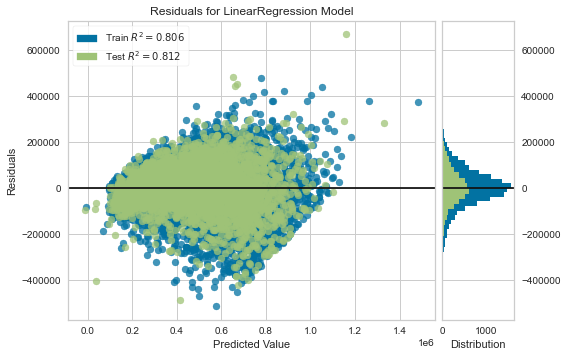

In [38]:
lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

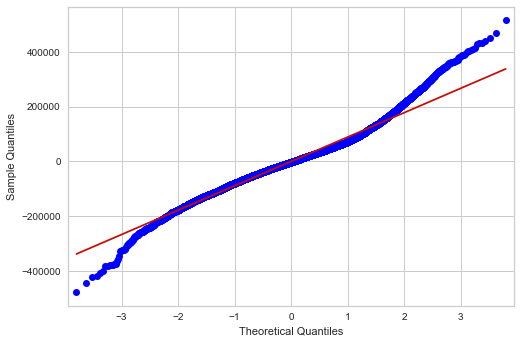

In [39]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

##### Model 6b

In [40]:
cols = ['sqft_living', 'bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [41]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8078044199599432
Test Score: 0.8143669163699322


In [42]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.808
Mean Absolute Error: 65731.199
Mean Squared Error: 8034363359.516
Root Mean Squared Error: 89634.610

Testing Metrics:
R2: 0.814
Mean Absolute Error: 63962.932
Mean Squared Error: 7652726437.574
Root Mean Squared Error: 87479.863


#### Model 7

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'condition', 'view', and 'zipcode'. 

In [43]:
cols = ['sqft_living', 'sqft_living15', 'bedrooms', 'bathrooms', 'yr_built'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [44]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8162984121309026
Test Score: 0.8209083160697839


In [45]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.816
Mean Absolute Error: 64187.454
Mean Squared Error: 7679288495.359
Root Mean Squared Error: 87631.550

Testing Metrics:
R2: 0.821
Mean Absolute Error: 63030.485
Mean Squared Error: 7383057144.564
Root Mean Squared Error: 85924.718


I want to take a look at the interaction between sqft_living and sqft_living15.

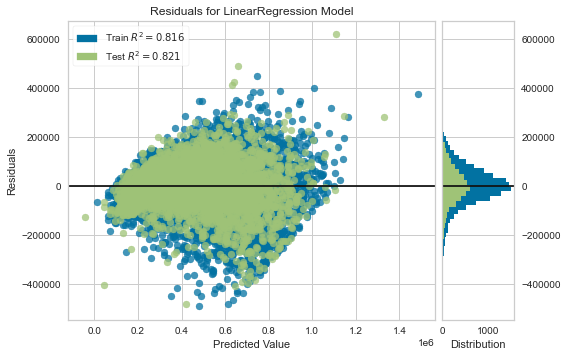

In [46]:
lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

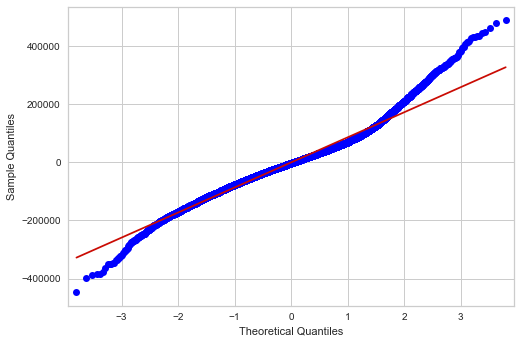

In [47]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

##### Model 7b

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'bedroom_bin', 'condition', 'view', and 'zipcode'.

In [48]:
cols = ['sqft_living', 'sqft_living15', 'bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [49]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8177610258953996
Test Score: 0.822780574427596


In [50]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.818
Mean Absolute Error: 63854.277
Mean Squared Error: 7618146764.440
Root Mean Squared Error: 87281.996

Testing Metrics:
R2: 0.823
Mean Absolute Error: 62643.044
Mean Squared Error: 7305873267.894
Root Mean Squared Error: 85474.401


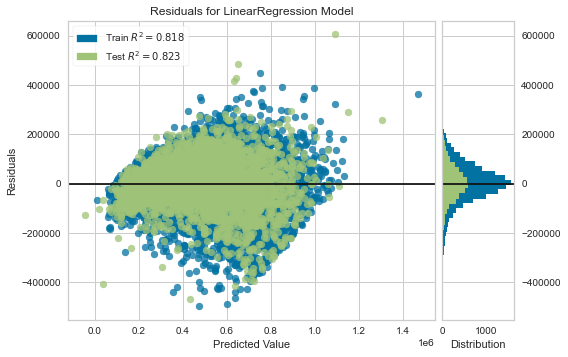

In [51]:
lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()


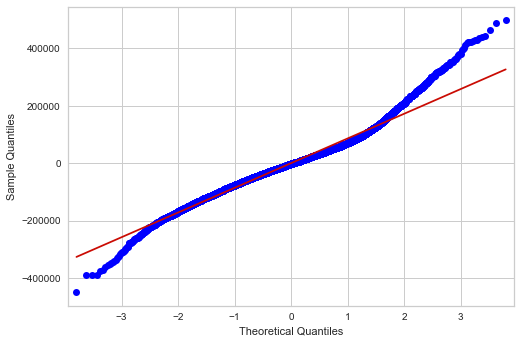

In [52]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

#### Model 8

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'waterfront' and the columns created from encoding 'bedroom_bin', 'condition', 'view', and 'zipcode'.

In [53]:
# + encoded_view  , 'waterfront'

In [54]:
cols = ['sqft_living', 'sqft_living15','bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition+ encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [55]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8059316098893734
Test Score: 0.8154899893298355


In [56]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.806
Mean Absolute Error: 65539.136
Mean Squared Error: 8112652551.220
Root Mean Squared Error: 90070.265

Testing Metrics:
R2: 0.815
Mean Absolute Error: 64036.232
Mean Squared Error: 7606427739.284
Root Mean Squared Error: 87214.837


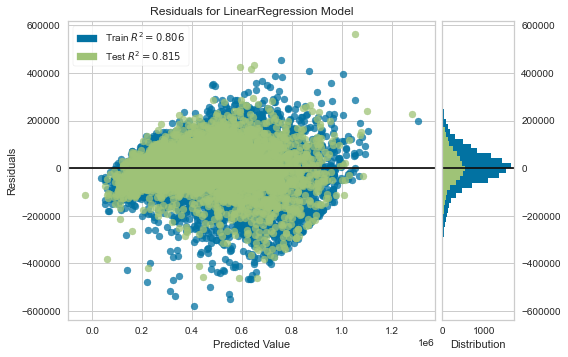

In [57]:
lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

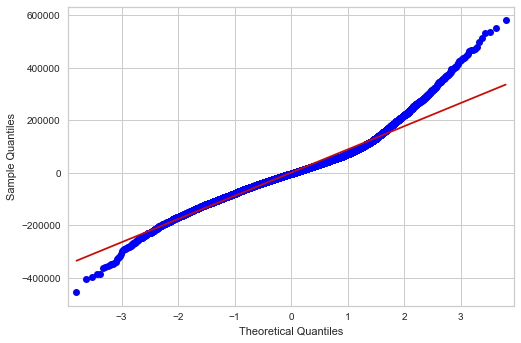

In [58]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

In [59]:
y = y_train
x = X_train.filter(cols, axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     679.2
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:48:01   Log-Likelihood:            -1.7521e+05
No. Observations:               13659   AIC:                         3.506e+05
Df Residuals:                   13575   BIC:                         3.512e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.537e+05   7.79e+04      7.110      0.000    4.01e+05    7.06e+05
sqft_living              125.7928      2.151     58.470      0.000     121.576     130.010
sqft_living15             70.5392      2.193     32.164      0.000      66.240      74.838
bathrooms               1.567e+04   1873.512      8.366      0.000     1.2e+04    1.93e+04
yr_built                -348.1581     39.696     -8.771      0.000    -425.968    -270.348
bedrooms_bin_x0_2BR     7323.2282   8787.440      0.833      0.405   -9901.373    2.45e+04
bedrooms_bin_x0_3BR     8227.9231   8732.668      0.942      0.346   -8889.319    2.53e+04
bedrooms_bin_x0_4BR     -297.7990   8943.193     -0.033      0.973   -1.78e+04    1.72e+04
bedrooms_bin_x0_5BR     -2.82e+04   9497.355     -2.970      0.003   -4.68e+04   -9588.098
bedrooms_bin_x0_6BR    -4.919e+04   1.19e+04     -4.120      0.000   -7.26e+04   -2.58e+04
bedrooms_bin_x0_7+BR   -1.409e+05   2.12e+04     -6.631      0.000   -1.83e+05   -9.92e+04
condition_x0_Fair      -3.836e+04   9066.545     -4.231      0.000   -5.61e+04   -2.06e+04
condition_x0_Good       1.376e+04   2001.806      6.875      0.000    9838.653    1.77e+04
condition_x0_Poor      -1.359e+05   2.43e+04     -5.590      0.000   -1.84e+05   -8.83e+04
condition_x0_Very Good  4.215e+04   3146.845     13.395      0.000     3.6e+04    4.83e+04
zipcode_x0_98002        1.515e+04   9838.343      1.540      0.124   -4138.114    3.44e+04
zipcode_x0_98003        1.238e+04   8854.362      1.398      0.162   -4974.496    2.97e+04
zipcode_x0_98004        5.211e+05   1.08e+04     48.076      0.000       5e+05    5.42e+05
zipcode_x0_98005        3.523e+05    1.2e+04     29.415      0.000    3.29e+05    3.76e+05
zipcode_x0_98006        2.948e+05   8292.409     35.545      0.000    2.78e+05    3.11e+05
zipcode_x0_98007        2.634e+05   1.12e+04     23.438      0.000    2.41e+05    2.85e+05
zipcode_x0_98008        2.579e+05   9020.264     28.590      0.000     2.4e+05    2.76e+05
zipcode_x0_98010        9.508e+04   1.57e+04      6.044      0.000    6.42e+04    1.26e+05
zipcode_x0_98011        1.471e+05   1.01e+04     14.586      0.000    1.27e+05    1.67e+05
zipcode_x0_98014        1.162e+05   1.59e+04      7.305      0.000     8.5e+04    1.47e+05
zipcode_x0_98019        8.788e+04   1.04e+04      8.426      0.000    6.74e+04    1.08e+05
zipcode_x0_98022        1.978e+04   1.06e+04      1.866      0.062    -992.490    4.05e+04
zipcode_x0_98023       -9812.6366   7776.615     -1.262      0.207   -2.51e+04    5430.607
zipcode_x0_98024        1.504e+05   2.03e+04      7.426      0.000    1.11e+05     1.9e+05
zipcode_x0_98027        2.361e+05   9073.009     26.018      0.000    2.18e+05    2.54e+05
zipcode_x0_98028        1.347e+05   9048.187     14.892      0.000    1.17e+05  

In [60]:
X_potentials = pd.DataFrame(columns = X_train.columns)

In [61]:
for num in range(0,1):
    X_potentials = X_potentials.append(
    pd.Series(0, index=X_potentials.columns), 
    ignore_index=True)

In [62]:
X_potentials['sqft_living'].replace(0,df['sqft_living'].median(),inplace=True)
X_potentials['sqft_living15'].replace(0,df['sqft_living15'].median(),inplace=True)
X_potentials['bathrooms'].replace(0,df.bathrooms.value_counts().index[0],inplace=True)
X_potentials['yr_built'].replace(0,df.yr_built.value_counts().index[0],inplace=True)

X_potentials['bedrooms_bin_x0_3BR'].replace(0,1,inplace=True)

#condition not needed. By default average

X_potentials['zipcode_x0_98103'].replace(0,1,inplace=True)


X_potentials2 = X_potentials

In [63]:
X_train.filter(cols, axis=1).head(1)

,sqft_living,sqft_living15,bathrooms,yr_built,bedrooms_bin_x0_2BR,bedrooms_bin_x0_3BR,bedrooms_bin_x0_4BR,bedrooms_bin_x0_5BR,bedrooms_bin_x0_6BR,bedrooms_bin_x0_7+BR,...,zipcode_x0_98146,zipcode_x0_98148,zipcode_x0_98155,zipcode_x0_98166,zipcode_x0_98168,zipcode_x0_98177,zipcode_x0_98178,zipcode_x0_98188,zipcode_x0_98198,zipcode_x0_98199
395,1220,2000,1.0,1950,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X_potentials[cols].loc[0]

sqft_living            1800
sqft_living15          1750
bathrooms               2.5
yr_built               2014
bedrooms_bin_x0_2BR       0
                       ... 
zipcode_x0_98177          0
zipcode_x0_98178          0
zipcode_x0_98188          0
zipcode_x0_98198          0
zipcode_x0_98199          0
Name: 0, Length: 83, dtype: object

LinearRegression()

In [86]:
visualizer.predict(X_potentials[cols])

array([596617.18627878])

In [67]:
df2 = df.filter(['price', 'grade'])
df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

,price
grade,
7 Average,3.348060e+09
8 Good,2.764695e+09
9 Better,1.290100e+09
6 Low Average,5.618325e+08
10 Very Good,4.126852e+08
11 Excellent,7.061156e+07
5 Fair,4.780555e+07
4 Low,3.962050e+06


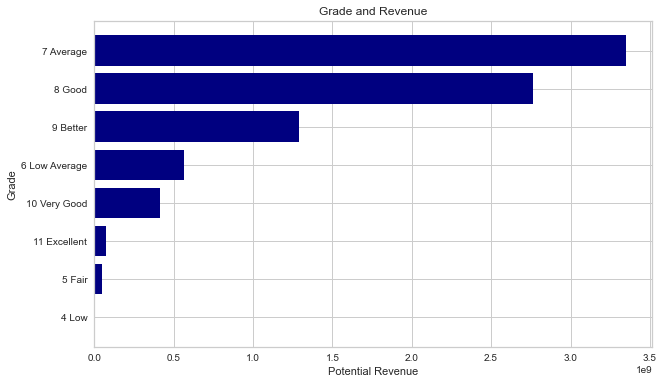

In [68]:
grade_vs_price = df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Grade and Revenue')
ax.set_ylabel('Grade')
ax.set_xlabel('Potential Revenue');

In [69]:
df.view.value_counts()

NONE         16870
AVERAGE        681
GOOD           257
FAIR           246
EXCELLENT      104
Name: view, dtype: int64

In [70]:
sum(model.pvalues > .05)

12

In [71]:
sum(model.pvalues > .05) / len(model.pvalues)

0.14285714285714285

In [72]:
sum(model.pvalues > .05)

12

In [73]:
sum(model.pvalues > .05) / len(model.pvalues)

0.14285714285714285

In [74]:
model.params.unique

<bound method Series.unique of const               553715.604638
sqft_living            125.792783
sqft_living15           70.539224
bathrooms            15673.178950
yr_built              -348.158115
                        ...      
zipcode_x0_98177    226790.925351
zipcode_x0_98178     67488.435230
zipcode_x0_98188     42738.005594
zipcode_x0_98198     50406.723214
zipcode_x0_98199    373352.037656
Length: 84, dtype: float64>

In [75]:
(df.bedrooms/df.bathrooms).value_counts()

2.000000    2967
1.600000    2108
1.200000    2022
3.000000    1696
1.714286    1669
            ... 
1.555556       1
1.052632       1
3.666667       1
1.473684       1
7.000000       1
Length: 73, dtype: int64

In [76]:
df.price.value_counts()

350000.0    156
450000.0    150
325000.0    140
550000.0    137
425000.0    137
           ... 
575575.0      1
837700.0      1
575550.0      1
739375.0      1
884744.0      1
Name: price, Length: 3274, dtype: int64

In [77]:
df.view.value_counts()

NONE         16870
AVERAGE        681
GOOD           257
FAIR           246
EXCELLENT      104
Name: view, dtype: int64

In [78]:
df.condition.value_counts()

Average      11900
Good          4726
Very Good     1433
Fair           132
Poor            21
Name: condition, dtype: int64

In [79]:
df.bedrooms.value_counts()

3     8610
4     5480
2     2547
5     1167
6      197
1      171
7       24
8        9
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [80]:
df.bathrooms.value_counts()

2.50    4550
1.00    3601
1.75    2692
2.00    1741
2.25    1718
1.50    1330
2.75     951
3.00     566
3.50     454
3.25     345
3.75      67
4.00      59
0.75      53
4.50      40
4.25      18
1.25       7
5.00       6
4.75       4
0.50       4
5.25       3
7.50       1
5.50       1
5.75       1
Name: bathrooms, dtype: int64

In [81]:
df.yr_built.value_counts()

2014    505
2005    401
2006    391
2003    385
2004    378
       ... 
1901     28
1902     24
1933     15
1935     15
1934     14
Name: yr_built, Length: 116, dtype: int64

In [82]:
df.price.median()

426000.0

In [83]:
df.price.mean()

466711.58554799034

Recommendations

Next steps